In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn; seaborn.set() #플롯 형식 설정

In [2]:
#판다는 Numpy를 기반으로 만들어진 새로운 패키지, DataFrame이라는 효율적인 자료구조를 제공. 

In [4]:
data = pd.Series([0.25,0.5,0.75,1.0])
data
#Series는 일련의 값과 인덱스를 모두 감싸고 있으며, 각각 Values와 index 속성으로 접근할 수 있다. values는 친숙한 Numpy 배열


0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [12]:
data.values
data.index
data[1]
data[2:3]

2    0.75
dtype: float64

In [15]:
data1 = pd.Series([0.25,0.5,0.75,1.0], index=['a','b','c','d'])
data1
data1['b']

0.5

In [22]:
data2 = pd.Series([0.25,0.5,0.75,1.0], index=[2,5,3,7]) #인접하지 않거나 연속적이지 않은 인덱스를 사용할 수도 있다.
data2
data3 = pd.Series(5, index=[100,200,300])
data3 #인덱스 갯수에 따라서 value수가 늘어남

100    5
200    5
300    5
dtype: int64

In [21]:
#특수한 딕셔너리
population_dict = {'California':38332521, 'Texas':26448193,'New York':19651127, 'Florida':19552860,'Illinois':12882135}
population = pd.Series(population_dict)
population
population['California']


38332521

In [26]:
area_dict = {'California':423967, 'Texas':695662,'New York':141297, 'Florida':170312,'Illinois':149995}
area = pd.Series(area_dict)
area

states = pd.DataFrame({'population':population, 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [28]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [30]:
states.columns

Index(['population', 'area'], dtype='object')

In [33]:
states['area']
states['population']


California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [38]:
pd.DataFrame(population, columns=['population'])
data = [{'a':1,'b':2*i} for i in range(3)]
data
pd.DataFrame(data)

,a,b
0,1,0
1,1,2
2,1,4


In [45]:
pd.DataFrame([{'a':1,'b':2},{'b':3,'c':4}])
pd.DataFrame([{'a':1,'b':2}])
pd.Series({'a':1,'b':2})

a    1
b    2
dtype: int64

In [53]:
pd.DataFrame(np.random.rand(3,2),  columns=['foo','bar'],index=['a','b','c'])
A = np.zeros(3, dtype=[('A','i8'),('B','f8')])
A
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [63]:
#Pandas Index 객체
#Series와 DataFrame 객체가 데이터를 참조하고 수정하게 해주는 명시적인 인덱스를 포함한다는 것을 알았다. 
#Index 객체는 그 자체로 흥미로운 구조체이며 불변의 배열이나 정렬된 집합(Index 객체가 중복되는 갑승ㄹ 포함할 수 있으므로 기술적으로 중복집합)
#으로 볼 수 있다.
#이 관점은 Index객체에서 사용할 수 있는 연산에 몇 가지 흥미로운 결과를 가져온다. 간단한 예로, 정수 리스트로부터 Index를 구성해보자
ind = pd.Index([2,3,5,7,11])
ind
ind[1]
ind[::2]
print(ind.size, ind.shape,ind.ndim,ind.dtype)
#Numpy와 Index객체의 한 가지 차이점이라면 Index 객체는 일반적인 방법으로는 변경될 수 없다는 불변의 값이다.

5 (5,) 1 int64


In [64]:
#Index: 정렬된 집합
#Pandas 객체는 집합 연산의 여러 측면에 의존하는 데이터세트 간의 조인과 같은 연산을 할 수 있게 하려고 고안됐다.
#Index 객체는 대체로 파이썬에 내장된 set 데이터 구조에서 사용하는 표기법을 따르기 때문에 합집합, 교집합, 차집합을 비롯해 그 밖의 조합들이 익숙한 방식으로 계산될 수 있다.


In [69]:
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])
indA&indB #교집합
indA|indB #합집합
indA^indB #대칭 차 (두 집합의 상대 여집합의 합)

Int64Index([1, 2, 9, 11], dtype='int64')

In [86]:
#Series에서 데이터 선택
data = pd.Series([0.25, 0.5, 0.75, 1.0], index = ['a','b','c','d'])
data
data['b']
'a' in data
data.keys()
list(data.items())
dict = {}
for item in data.items():
#      print(item)
    dict[item[0]]=item[1]
dict


{'a': 0.25, 'b': 0.5, 'c': 0.75, 'd': 1.0}

In [99]:
list(data.items())
data['e']=1.25
data
data['a':'c']
data[0:2]
data[(data>0.3)&(data<1.2)] #마스킹
data[['a','c']] #팬시인덱싱


a    0.25
c    0.75
dtype: float64

In [104]:
data = pd.Series(['a','b','c'], index=[1,3,5])
data[1]
data[1:3]

3    b
5    c
dtype: object

In [107]:
#loc: 명시적인 인덱스를 참조하는 인덱싱과 슬라이싱을 가능하게 한다
data.loc[1]
data.loc[1:3]


1    a
3    b
dtype: object

In [109]:
#iloc: iloc 속성은 인덱싱과 슬라이싱에서 언제나 암묵적인 파이썬 스타일의 인덱스를 참조하게 해준다.
data.iloc[0:2]
data

1    a
3    b
5    c
dtype: object

In [124]:
states
states['area']
states.area #윗 문장과 동일한 결과 출력
states.area is states['area']
states['density']=states.population/states.area
states
states.values
# states.T #원래 테이블배열의 행과 열을 바꾼다
states.values[0]

array([3.83325210e+07, 4.23967000e+05, 9.04139261e+01])

In [157]:
states.loc[states.density>100,['population','density']]
states.iloc[0,2] = 110
states
#Pandas에서 데이터가공을 능숙하게 하려면 
#간단한 DataFrame에 시간을 투자해서 다양한 인덱싱 기법이 제공하는 인덱싱, 슬라이싱, 마스킹, 팬시 인덱싱 유형을 알아보는것이 좋다

#추가적인 인덱싱 규칙
states['Florida':'Illinois']
states[states.density>100]
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))
df = pd.DataFrame(rng.randint(0,10,(3,4)), columns=['A','B','C','D'])
df
np.exp(ser)
2.71828**7 #책 페이지 133



1096.6279948676925

In [159]:
#Series에서 인덱스 정렬
A = pd.Series([2,4,6], index=[0,1,2])
B = pd.Series([1,3,5], index=[1,2,3])
A+B #NaN 값 사용을 원치 않을 경우, 연산자 대신에 적절한 객체 메서드를 사용해 채우기 값을 수정할 수 있다. 예를 들어, A.add(B)

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [162]:
A.add(B, fill_value=0)


0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [174]:
A = pd.DataFrame(rng.randint(0,20,(2,2)), columns=list('AB'))
A


,A,B
0,9,6
1,8,6


In [197]:
B = pd.DataFrame(rng.randint(0,20,(3,3)), columns=list('ABC'))
B

,A,B,C
0,4,13,6
1,8,14,14
2,9,12,18


In [198]:
A+B
A.add(B, fill_value=0)
fill = A.stack().mean() #먼저 A의 행을 쌓아서 계산한 모든값의 평균값

In [199]:
# A.stack().mean()
# np.mean([9,6,8,6])
A.add(B, fill_value=fill)

,A,B,C
0,13.00,19.00,13.25
1,16.00,20.00,21.25
2,16.25,19.25,25.25


In [205]:
#누락된 데이터 처리
vals = np.array([1,None,3,4])
vals
for dtype in ['object','int']:
    print('dtype=', dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype= object
79.1 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype= int
3.29 ms ± 995 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [210]:
vals1 = np.array([1,np.nan,3,4])
vals1.dtype


dtype('float64')

In [219]:
1+np.nan
0*np.nan

vals1.sum()
vals1.min()
vals1.max()

C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


nan

In [230]:
np.nansum(vals1), np.nanmin(vals1), np.nanmax(vals1)

pd.Series([1,np.nan,2,None])
x = pd.Series(range(2), dtype=int)
x
x[0]=None
x #Pandas는 정수 배열을 부동 소수점으로 변환하는 것 외에도 자동으로 None을 NaN값으로 변환한다


0    NaN
1    1.0
dtype: float64

In [243]:
#널 값 계산하기
#isnull(), notnull(), dropna(), fillna()
data = pd.Series([1, np.nan, 'hello',None])
data.isnull()
data.notnull()
data[data.notnull()]
data.dropna()
df = pd.DataFrame([[1,np.nan,2],[2,3,5],[np.nan,4,6]])
df
df.dropna() #dropna()는 기본적으로 널 값이 있는 모든 행 전체를 삭제한다
df.dropna(axis='columns') #axis=1은 널 값을 포함하는 모든 열을 삭제한다
#하지만 dropna() 방식은 일부 유효한 데이터도 삭제하기 때문에 문제를 일으킬 여지가 있음


,2
0,2
1,5
2,6


In [254]:
df[3]=np.nan
df
df.dropna(axis=1, how='all')
#how='any'가 기본값, 널 값을 포함하는 행이나 열을 모두 삭제한다. 또한, how='all'로 지정해 모두 행/열이 전체 널값일 때만 삭제
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [255]:
#세부적인 제어가 가능케 thresh 매개변수 이용해 행이나 열에서 널이 아닌 값이 최소 몇개가 있어야 하는지 지정할 수 있다
df.dropna(axis=0, thresh=3) #널 값이 최소 3개 이상인 행만 남기고 삭제


,0,1,2,3
1,2.0,3.0,5,NaN


In [265]:
#널값 채우기!!!!!!
#때때로 유효한 값으로 널값을 대체해야 할 때도 있다. 그 값은 0고 ㅏ같은 단일 숫자일 수도 있고, 유효한 값으로부터 전가 혹은 보간된 값일 수도 있다. 
data = pd.Series([1,np.nan, 2, None, 3],index=list('abcde'))
data
data.fillna(0) #0과 같은 단일값으로 NA 항목을 채울 수 있다.
data.fillna(method='ffill') #이전 값으로 채우도록 지정할 수 있다.
data.fillna(method='bfill') #뒤에 있는 값을 앞으로 전달하도록 지정할 수 있다.
df
df.fillna(method='ffill', axis=1) #이때 뒤의 값을 채울 때 이전 값을 사용할 수 없다면 NA 값은 그대로 남는다는 점을 명심하기


,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [290]:
#계층적 인덱싱
index = [('California', 2000),('California',2010), ('New York',2000),('New York',2010),('Texas',2000),('Texas',2010)]

index = pd.MultiIndex.from_tuples(index)
index
populations = [33871648, 37253956,18976457,19378102,20851820,25145561]
pop = pd.Series(populations, index=index)
pop
pop.index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [283]:
pop[[i for i in pop.index if i[1]==2010]]

California  2010    37253956
New York    2010    19378102
Texas       2010    25145561
dtype: int64

In [292]:
population1 = pd.DataFrame(populations, index=index)
population1
population1.index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [294]:
pop.unstack()

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [297]:
pop_df = pd.DataFrame({'total':pop,'under18':[926789,9284984,4687374,4319033,5906301,6879014]})
pop_df

total  under18
California 2000  33871648   926789
           2010  37253956  9284984
New York   2000  18976457  4687374
           2010  19378102  4319033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [300]:
f_u18 = pop_df['under18']/pop_df['total']
f_u18 #연도별 18세 이하의 인구 비율 계산

California  2000    0.027362
            2010    0.249235
New York    2000    0.247010
            2010    0.222882
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [303]:
f_u18.unstack()

,2000,2010
California,0.027362,0.249235
New York,0.247010,0.222882
Texas,0.283251,0.273568


In [307]:
df = pd.DataFrame(np.random.rand(4,2), index=[['a','a','b','b'],[1,2,1,2]], columns=['data1','data2'])
df #MultiIndex를 백그라운드에서 자동으로 생성함


data1     data2
a 1  0.902130  0.905879
  2  0.243944  0.119679
b 1  0.464843  0.279859
  2  0.820165  0.567171

In [311]:
data = {('California',2000):33871648, ('California',2010):37253945, ('Texas',2000):20851820, ('Texas',2010):25145561, ('New York',2000):18976457, ('New York', 2010):19378102}
pd.Series(data)



California  2000    33871648
            2010    37253945
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [316]:
#MultiIndex를 생성하는게 유용할 때가 있다.
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [318]:
#단일 인덱스의 데카르트 곱(cartesian product)으로부터 MultiIndex를 생성할 수도 있다.
pd.MultiIndex.from_product([['a','b'],[1,2]]) #헐 대박쉬움~~~~~!!!!

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [321]:
#MultiIndex의 레벨에 이름을 지정하는 것이 편리할 때가 있다. 
pop.index.names=['state','year']
pop


state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [326]:
#열의 MultiIndex
index = pd.MultiIndex.from_product([[2013,2014],[1,2]], names=['year','visit'])
index
columns = pd.MultiIndex.from_product([['Bob','Guido','Sue'],['HR','Temp']], names=['subject','type'])
columns




MultiIndex(levels=[['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['subject', 'type'])

In [342]:
#일부 데이터 모형 만들기
data = np.round(np.random.rand(4,6),1)  #Round an array to the given number of decimals.
data[::2] *=10
data+=37
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data



subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      38.0  38.0  41.0  45.0  42.0  47.0
     2      37.5  37.6  37.5  37.7  37.0  37.2
2014 1      42.0  43.0  44.0  43.0  44.0  46.0
     2      37.1  37.9  37.9  37.3  37.8  37.1

In [344]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      41.0  45.0
     2      37.5  37.7
2014 1      44.0  43.0
     2      37.9  37.3

In [353]:
#MultiIndex 인덱싱 및 슬라이싱
pop
pop['California',2000]
pop.loc['California':'New York']
pop.loc[:,2000]
pop[pop>20000000]
pop[['California','Texas']]


state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [366]:
#다중 인덱스를 가진 DataFrame
health_data
health_data['Guido']
health_data['Guido','HR']
health_data.iloc[:2,:2]
health_data.loc[:,('Bob','HR')]

year  visit
2013  1        38.0
      2        37.5
2014  1        42.0
      2        37.1
Name: (Bob, HR), dtype: float64

In [376]:
#IndexSlice 객체 이용해 슬라이스 만들기
idx= pd.IndexSlice
health_data.loc[idx[2013,:],idx[:,"HR"]]



subject      Bob Guido   Sue
type          HR    HR    HR
year visit                  
2013 1      38.0  41.0  42.0
     2      37.5  37.5  37.0

In [383]:
#다중 인덱스 재정렬하기
index = pd.MultiIndex.from_product([['a','c','b'],[1,2]], names=['char','int'])
data = pd.Series(np.random.rand(6), index=index)
# data.index.names=['char','int']
data

char  int
a     1      0.667620
      2      0.946351
c     1      0.789490
      2      0.136788
b     1      0.828964
      2      0.980565
dtype: float64

In [391]:
data = data.sort_index()
data #a-c-b순이였던 Index를 a-b-c의 순서로 바꿔 슬라이스를 편하게 해준다
data['a':'b']

char  int
a     1      0.667620
      2      0.946351
b     1      0.828964
      2      0.980565
dtype: float64

In [399]:
#인덱스 스태킹 및 언스태킹 
#다중 인덱스에서 간단한 2차원 표현으로 변경할 수 있으며, 이때 선택적으로 사용할 레벨을 지정할 수 있다
pop.unstack()
pop.unstack(level=1)
# pop.unstack(level=0)
pop.unstack().stack()  #unstack()의 역은 stack()으로, 원래 시리즈로 회복하는데 사용할 수 있다.


state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [404]:
#인덱스 설정 및 재설정
pop_flat = pop.reset_index(name='population')
pop_flat 
#계층적 데이터 재정렬시 reset_index 메서드 사용. 
#인구 딕셔너리 pop에서 이 메서드를 호출하면 전에 인덱스에 있던 정보를 그대로 유지하는 state와 year열을 가진 DataFrame을 얻게 된다. 명확성을 위해 선택적으로 열에 표현할 데이터의 이름을 지정할 수 있다.

pop_flat.set_index(['state','year'])


population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [410]:
#다중 인덱스에서 데이터 집계
health_data
#앞에서 pandas가 기본적으로 mean(),sum(),max()와 같은 데이터 집계 메서드를 제공하는 것을 봤다.
data_mean = health_data.mean(level='year')
data_mean


subject    Bob         Guido          Sue       
type        HR   Temp     HR   Temp    HR   Temp
year                                            
2013     37.75  37.80  39.25  41.35  39.5  42.10
2014     39.55  40.45  40.95  40.15  40.9  41.55

In [412]:
data_mean.mean(axis=1, level='type') #axis 키워드를 이용해 열의 레벨 간 평균을 취할 수도 있다.



type,HR,Temp
year,,
2013,38.833333,40.416667
2014,40.466667,40.716667


In [414]:
#데이터 세트 결합: Concat과  Append
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [419]:
#Numpy 배열 연결
x = [1,2,3]
y = [4,5,6]
z = [7,8,9]
np.concatenate([x,y,z])
x = [[1,2],[3,4]]
np.concatenate([x,x],axis=0)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [421]:
#pd.concat을 이용한 간단한 연결

ser1 = pd.Series(['A','B','C'], index=[1,2,3])
ser2 = pd.Series(['D','E','F'], index=[4,5,6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [437]:
df1 = make_df('AB',[1,2])
df1
df2 = make_df('AB',[3,4])
df2
pd.concat([df1,df2])
pd.concat([df1,df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [431]:
df3 = make_df('AB',[0,1])
df4 = make_df('CD',[0,1])
pd.concat([df3,df4], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [441]:
#인덱스 복제
x = make_df('AB',[0,1])
y = make_df('AB',[2,3])
x
# y.index = x.index #복제 인덱스 생성
# x
# y
# pd.concat([x,y])

,A,B
0,A0,B0
1,A1,B1


In [446]:
###Join(조인)을 이용한 연결
df5 = make_df('ABC',[1,2])
df6 = make_df('BCD', [3,4])
print(pd.concat([df5,df6]))
print(pd.concat([df5,df6], join='inner')) #join='inner'를 이용하여 교집합, 기본형은 열의 합집합(join='outer')

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


C:\Users\sweet\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [449]:
pd.concat([df5, df6], join_axes=[df5.columns]) #join_axes 인수를 사용해 남은 열의 인덱스를 직접 지정하는 것
pd.concat([df5,df6],join_axes=[df6.columns])


,B,C,D
1,B1,C1,NaN
2,B2,C2,NaN
3,B3,C3,D3
4,B4,C4,D4


In [452]:
#append 메서드: 배열을 직접 연결하는 것, Series와 DataFrame 객체는 더 적은 키 입력으로 똑같은 작업을 수행할 수 있게 해준다.
df1.append(df2)
df1 #일반 append()나 extend() 메서드와 달리 Pandas의 append() 메서드는 원래의 객체를 변경하지 않는 대신 결합된 데이터를 가지는 새로운 객체를 만든다.


,A,B
1,A1,B1
2,A2,B2


In [4]:
#데이터세트 결합하기: 병합과 조인
# 1. pd.merge()에는 관계 데이터(relationaldata)를 조작하는 규칙의 정형 집합이자 대부분의 데이터베이스에서 사용할 수 있는 연산으 ㅣ개념적 기반을 형성하는 관계 대수(relational algebra)의 하위집합에 해당하는 행위가 구현되어 있다.

#일대일조인
df1 = pd.DataFrame({'employee':['Bob','Jake','Lisa','Sue'], 'group':['Accounting','Engineering','Engineering','HR']})
df2 = pd.DataFrame({'employee':['Bob','Jake','Lisa','Sue'], 'hire_date':['2004','2008','2012','2014']})

print(df1, df2)
df3 = pd.merge(df1,df2)
df3

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR   employee hire_date
0      Bob      2004
1     Jake      2008
2     Lisa      2012
3      Sue      2014


,employee,group,hire_date
0,Bob,Accounting,2004
1,Jake,Engineering,2008
2,Lisa,Engineering,2012
3,Sue,HR,2014


In [5]:
#다대일(Many-to-one) 조인
#다대일 조인은 두 개의 키 열 중 하나가 중복된 항목을 포함하는 경우의 조인
df4 = pd.DataFrame({'group':['Accounting','Engineering','HR'],'supervisor':['Carly','Guido','Steve',]})
df4
pd.merge(df3, df4) #DataFrame에는 'supervisor' 정보를 담고 있는 추가 열이 있는데, 그 정보는 입력값에 따라 하나 이상의 위치에 반복해서 등장한다



,employee,group,hire_date,supervisor
0,Bob,Accounting,2004,Carly
1,Jake,Engineering,2008,Guido
2,Lisa,Engineering,2012,Guido
3,Sue,HR,2014,Steve


In [6]:
#다대다(Many-to-Many) 조인
df5 = pd.DataFrame({'group':['Accounting','Accounting','Engineering','Engineering','HR','HR'],'skills':['math','spreadsheets','coding','linux','spreadsheets','organization']})
pd.merge(df1, df5)   
                                                                                        

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [7]:
import pandas as pd
#병합키 지정
#현재 예시들처럼 데이터가 깔끔한 경우는 드물기 때문에 병합키를 지정해 특정기준에 맞게 데이터를 병합한다
pd.merge(df1,df2, on='employee') # 이 옵션은 왼쪽과 오른쪽 DataFrame이 모두 지정된 열 이름을 가진 경우에만 동작한다

df3 = pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'],'Salary':[70000,80000,120000,90000]})
pd.merge(df1, df3, left_on='employee', right_on='name') #결과가 불필요하게 중복된 열을 갖게 되며, 원하는 경우 drop() 메서드 통해 삭제

# pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)

,employee,group,name,Salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [8]:
#left_index와 right_index 키워드

df1a = df1.set_index('employee') #때로는 열로 병합하는 대신 인덱스로 병합하는 경우도 있다.
df2a = df2.set_index('employee')
df1a
df2a
pd.merge(df1a, df2a,left_index=True, right_index=True) #여기서 pd.merge()의 left_index나 right_index를 지정해 병합키로 인덱스를 사용가능

,group,hire_date
employee,,
Bob,Accounting,2004
Jake,Engineering,2008
Lisa,Engineering,2012
Sue,HR,2014


In [9]:
#편의를 위해 DataFrame은 기본적으로 인덱스 기반으로 조인하는 병합을 수행하는 join() 메서드를 구현
df1a.join(df2a)
pd.merge(df1a, df3, left_index=True, right_on='name')

,group,name,Salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


In [501]:
#조인을 위한 집합 연산 지정하기: 고려사항인 조인에 사용되는 집합 연산 유형에 대해 알아보기
df6 = pd.DataFrame({'name':['Peter','Paul','Mary'], 'food':['fish','beans','bread']}, columns=['name','food'])
df7 = pd.DataFrame({'name':['Mary','Joseph'], 'drink':['wine','beer']}, columns=['name','drink'])
df7
pd.merge(df6, df7, how='left')
pd.merge(df6,df7, how='right')

#열 이름이 겹치는 경우: suffixes 키워드
df8 = pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'], 'rank':[1,2,3,4]})
df9 = pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'], 'rank':[3,1,4,2]})
pd.merge(df8, df9, on='name')

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [505]:
#rank_x, rank_y 같은 기본값이 적절하지 않다면 suffixes 키워드를 사용해 접미사를 별도로 지정할 수 있다.
print(df8, df9)
pd.merge(df8, df9, on='name',suffixes=['_R','_L'])

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4    name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2


,name,rank_R,rank_L
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [509]:
pop=pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

print(pop.head())
print(areas.head())
print(abbrevs.head()) #처음 다섯줄 데이터 보여줌. 데이터 세트 살펴볼 때 유용


  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [516]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) #중복정보 삭제
merged.head()
merged.isnull().any() #이 코드에 불일치하는 항목이 있는지 다시 한번 확인. 널 값을 가진 행

#결과를 보면 일부 population 정보가 널 값이다. 
merged[merged['population'].isnull()].head() #이 널 값은 모두 2000년 이전의 푸에르토리코에서 비롯됐음을 알 수 있다. 이는 원본 소스에 사용할 수 있는 데이터가 없기 때문인 듯하다.
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [519]:
final1 = pd.merge(merged, areas, on='state', how='right')
final1.head()


,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012.0,1117489.0,Alabama,52423
1,AL,total,2012.0,4817528.0,Alabama,52423
2,AL,under18,2010.0,1130966.0,Alabama,52423
3,AL,total,2010.0,4785570.0,Alabama,52423
4,AL,under18,2011.0,1125763.0,Alabama,52423


In [523]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state             True
area (sq. mi)     True
dtype: bool

In [541]:
merged.loc[merged['state'].isnull(), 'state/region'].unique() #state 항목도 널 값이 것을 볼 수 있으며, 이는 abbrevs 키에 해당 항목이 없음을 의미한다.
# merged.loc[merged['state/region']=='USA',:]

array(['PR', 'USA'], dtype=object)

In [558]:
merged.loc[merged['state/region']=='PR', 'state']='Puerto Rico'
merged.loc[merged['state/region']=='USA', 'state']='United States'
merged.isnull().any()
merged.loc[merged['state/region'].notnull(), 'state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'United States'], dtype=object)

In [560]:
merged.loc[merged['state'].notnull(), 'state/region'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR', 'USA'],
      dtype=object)

In [576]:
final = pd.merge(merged, areas, on='state', how='left')
final
merged.loc[merged['population'].isnull(), 'state']
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [578]:
final.isnull().any()
final.loc[final['area (sq. mi)'].isnull(), 'state'].unique() # areas DataFrame이 전체 미국 면접을 담고 있지 않음을 알 수 있다.
#적절한 값을 삽입할 수도 있지만, 이 경우에는 미국 전체의 인구 밀도가 현재 논의하는 내용과 관련이 없기 때문에 그냥 널 값을 삭제할 것이다.

final.dropna(inplace=True)
final.head()
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [583]:
final.loc[final['state']=='United States', 'population'].unique()

array([], dtype=float64)

In [619]:
#우리는 이제 필요한 모든 데이터를 갖췄다
print('state' in final.columns)

True


In [658]:
data2010 = final.query('year == 2010 & ages == "total"') 
#궁금한 질문에 답변하기 위해 먼저 2010년과 전체인구(total population)에 해당하는 데이터 부분 선택하기.
#이 작업을 신속하게 처리하기 위해서는 query()함수 사용 (이 함수 사용시 numexpr패키지가 필요)
data2010.head()
data2010.set_index('state', inplace=True)

# # data2010

In [664]:
density = data2010['population']/data2010['area (sq. mi)']
# # print('state' in data2010.columns)
density.sort_values(ascending=False, inplace=True)
density.head()


state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [666]:
density.tail() #리스트의 마지막 부분도 확인

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [675]:
#집계와 분류
#seaborn 패키지를 통해 사용할 수 있는 행성 데이터 세트를 사용. 
#이 데이터는 천문학자가 다른 별(외계행성 또는 외행성) 주변에서 발견한 행성에 대한 정보를 제공한다
import seaborn as sns
planet = sns.load_dataset('planets')
planet.shape
planet.head() # 이 데이터는 2014년까지 발견된 1000개 이상의 외계 행성에 대한 세부 정보를 담고 있다.
rng =np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
sir = pd.Series(np.random.RandomState(42).rand(5))
sir


0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [693]:
df = pd.DataFrame({'A':  rng.rand(5), 'B': rng.rand(5)})
df
df.mean(axis=1)
df.mean(axis=0)

A    0.658721
B    0.471904
dtype: float64

In [701]:
planet.isnull().any()
planet.describe()


,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [703]:
planet.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [712]:
#groupby:분할, 적용, 결합
#(split, apply, combine)

df = pd.DataFrame({'key':['A','B','C','A','B','C'], 'data':range(6)}, columns=['key','data'])
df
df.groupby('key').sum()


,data
key,
A,3
B,5
C,7


In [719]:
planet.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [718]:
planet.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [728]:
for (method, group) in planet.groupby('method'):
    print(method, group)
    print("{0:30s} shape = {1}".format(method, group.shape))

Astrometry          method  number  orbital_period  mass  distance  year
113  Astrometry       1          246.36   NaN     20.77  2013
537  Astrometry       1         1016.00   NaN     14.98  2010
Astrometry                     shape = (2, 6)
Eclipse Timing Variations                        method  number  orbital_period  mass  distance  year
32  Eclipse Timing Variations       1        10220.00  6.05       NaN  2009
37  Eclipse Timing Variations       2         5767.00   NaN    130.72  2008
38  Eclipse Timing Variations       2         3321.00   NaN    130.72  2008
39  Eclipse Timing Variations       2         5573.55   NaN    500.00  2010
40  Eclipse Timing Variations       2         2883.50   NaN    500.00  2010
41  Eclipse Timing Variations       1         2900.00   NaN       NaN  2011
42  Eclipse Timing Variations       1         4343.50  4.20       NaN  2012
43  Eclipse Timing Variations       2         5840.00   NaN       NaN  2011
44  Eclipse Timing Variations       2         1

In [733]:
planet.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [736]:
planet.groupby('method')['year'].describe().unstack().head()

       method                       
count  Astrometry                        2.0
       Eclipse Timing Variations         9.0
       Imaging                          38.0
       Microlensing                     23.0
       Orbital Brightness Modulation     3.0
dtype: float64

In [743]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key':['A','B','C','A','B','C'], 'data1': range(6), 'data2':rng.randint(0,10,6)}, columns=['key','data1','data2'])
df


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [745]:
df.groupby('key').aggregate([min, np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [749]:
df.groupby('key').aggregate({'data1':min, 'data2':max})
df.describe()

,data1,data2
count,6.000000,6.000000
mean,2.500000,4.500000
std,1.870829,3.209361
min,0.000000,0.000000
25%,1.250000,3.000000
50%,2.500000,4.000000
75%,3.750000,6.500000
max,5.000000,9.000000


In [1]:
def filter_func(x):
    return x['data2'].std() > 4

print(df); print(df.groupby('key').std()); print(df.groupby('key').filter(filter_func))

NameError: name 'df' is not defined

In [19]:
#피벗테이블 (Pivot table)
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
titanic.groupby('sex')[['survived']].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [23]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [16]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [50]:
titanic.groupby(['class','sex'])['survived'].aggregate('mean').unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [45]:
titanic.groupby(['sex','class'])[['survived']].aggregate('mean').unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [57]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [58]:
titanic.pivot_table('survived', 'sex','class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [59]:
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived',['sex',age], 'class') # groupby survived, index, columns

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [93]:
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived',['sex',age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [97]:
fare = pd.qcut(titanic['fare'], 2) #pd.qcut: 열 기준으로 동작할 때. 
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived',['sex',age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [100]:
fare = pd.cut(titanic['fare'], 2)
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived',['sex',age], [fare, 'class'])

fare            (-0.512, 256.165]                     (256.165, 512.329]
class                       First    Second     Third              First
sex    age                                                              
female (0, 18]           0.900000  1.000000  0.511628                1.0
       (18, 80]          0.971429  0.900000  0.423729                1.0
male   (0, 18]           0.800000  0.600000  0.215686                NaN
       (18, 80]          0.369565  0.071429  0.133663                0.5

In [102]:
#DataFrame.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
# DataFrame 의 Pivot_table 메서드의 전체 호출 시그니처

In [105]:
titanic.pivot_table(index='sex',columns='class', aggfunc={'survived':'sum', 'fare':'mean'}) #aggfunc 키워드는 어떤 유형의 집계를 적용할지 제어하며 기본적으로 평균이 적용된다.


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [118]:
titanic.groupby(['sex','class'])[['fare','survived']].mean().unstack()
a = titanic.groupby(['sex','class'])[['fare']].mean().unstack()
b = titanic.groupby(['sex','class'])[['survived']].sum().unstack()
pd.merge(a, b, left_index=True, right_on='sex')

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [131]:
births = pd.read_csv('births.csv')
births.head()


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [135]:
births['decade']=10*(births['year']//10)
199//10
births['decade'].head()
births.describe()
births.pivot_table('births',index='decade', columns='gender',aggfunc='sum') #연대마다 항상 남성의 출생률이 여성보다 높았음을 알수 있다.


gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


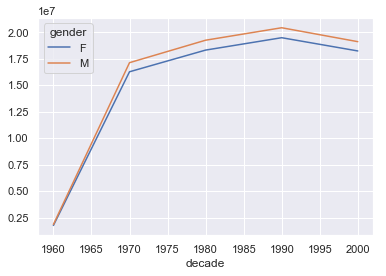

In [140]:
import matplotlib.pyplot as plt
sns.set() #seaborn 스타일 사용

births.pivot_table('births',index='decade', columns='gender',aggfunc='sum').plot()
# plt.ylabel('total births per year')

Text(0,0.5,'total births per year')

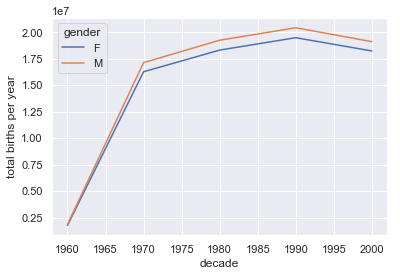

In [142]:
births.pivot_table('births',index='decade', columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year')

Text(0,0.5,'total births per year')

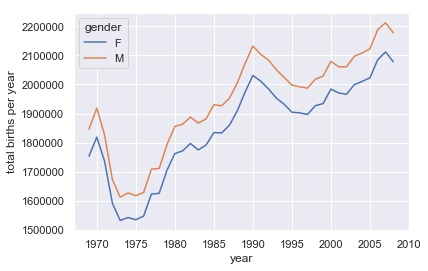

In [144]:
births.pivot_table('births',index='year', columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year')

In [160]:
#추가 데이터 탐색: 피벗 테이블과 꼭 상관있는 것은 아니지만 지금까지 다룬 Pandas 도구를 사용해 이 데이터세트에서 뽑아낼 수 있는 몇 가지 흥미로운 특지이 있다.
#먼저 데이터 정제가 필요 e.g. 오타, 누락값 등
quartiles = np.percentile(births['births'],[25,50,75])
quartiles
mu = quartiles[1]
mu
sig = 0.74 * (quartiles[2]-quartiles[0]) #0.74는 가우스 분포의 사분위 수에서 비롯. query() 메서드를 사용해 이 값에서 벗어난 출생 수를 가진 행을 걸러낼 예정
# print(quartiles, mu, sig, births['births'].median())
births = births.query('(births > @mu - 5 * @sig)&(births < @mu + 5 * @sig)') #다음으로 day 열을 정수형으로 설정한다.
births
#이전에는 데이터세트의 일부 열이 'null'값을 포함했기 때문에 데이터 타입이 문자열이였다.
births['day'] = births['day'].astype(int)

#마지막으로 날짜, 월, 연도를 결합해 Date 인덱스를 생성할 수 있다.
# 년(year), 월(month), 일(day)로부터 날짜(datetime) 인덱스 생성

births.index = pd.to_datetime(10000*births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

Text(0,0.5,'mean births by day')

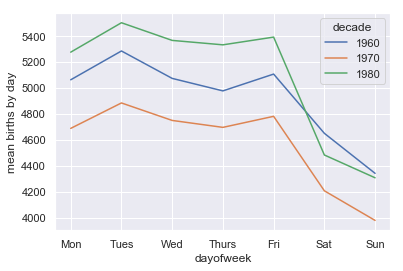

In [166]:
import matplotlib as mpl
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['','Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('mean births by day') #출생수가 주중보다 주말에 약간 더 낮은 것을 확인할 수 있다. 


In [171]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [175]:
# births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
# births_by_date.head()

TypeError: cannot unpack non-iterable Timestamp object

In [177]:
x = np.array([2,3,5,7,11,13])
x*2


NameError: name 'd' is not defined

In [181]:
data = ['peter','Paul','MARY','gUIDO']
a = [s.capitalize() for s in data]
a
#Pandas는 문자열을 담고 있는 Pandas Series와 Index 객체의 str 속성을 통해 벡터화된 문자열ㅇ 연산을 수행하고 누락된 데이터를 올바르게 처리하기 위한 기능을 제공한다.

['Peter', 'Paul', 'Mary', 'Guido']

In [183]:
names = pd.Series(data) 
names


0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

In [185]:
names.str.capitalize()
#str 속성에 탭 자동 완성을 사용하면 Pandas에 사용하는 모든 벡터화 된 문자열 메서드의 목록을 볼 수 있다.


0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [187]:
#Pandas 문자열 메서드 목록
monte = pd.Series(['Graham Chapman','John Cleese','Terry Gilliam','Eric Idle','Terry Jones','Michael Palin'])


In [190]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [192]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [194]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [195]:
monte.str.split() #각 요소에 대한 리스트나 다른 복합 값을 반환한다.

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object